# In this notebook, we're going to implement the methods of statsmodels in learned in the lecture.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Let's get started with OLS, which performs linear regresion with ordinary least squares as loss.

In [50]:
# Let's generate some data
# Number of samples
n_samples = 100

# Generate independent variables
x1 = np.random.normal(10, 2, n_samples)  # Mean=10, Std=2
x2 = np.random.normal(20, 5, n_samples)  # Mean=20, Std=5
x3 = np.random.normal(30, 10, n_samples) # Mean=30, Std=10

# Generate a dependent variable with some linear relationship and noise
y = 3.5 * x1 + 2.0 * x2 - 1.5 * x3 + np.random.normal(0, 10, n_samples)

# Combine into a DataFrame
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
})

# Display the first few rows of the DataFrame
print(df.head())

          x1         x2         x3          y
0   8.856467  19.493364  25.372745  40.126950
1  10.358794  24.003913  53.792941   2.350632
2   9.389093  18.288398  35.444307  15.805981
3  13.345160  18.033210  21.336497  55.943922
4  10.792212  11.966226  32.286078  18.208781


#### running linear regression:

In [51]:
X = df.drop(["y"],axis =1)
y = df["y"]
results = sm.OLS(y,X).fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              394.0
Date:                Sat, 31 Aug 2024   Prob (F-statistic):                    3.62e-54
Time:                        21:09:11   Log-Likelihood:                         -368.02
No. Observations:                 100   AIC:                                      742.0
Df Residuals:                      97   BIC:                                      749.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Let's plot the results:

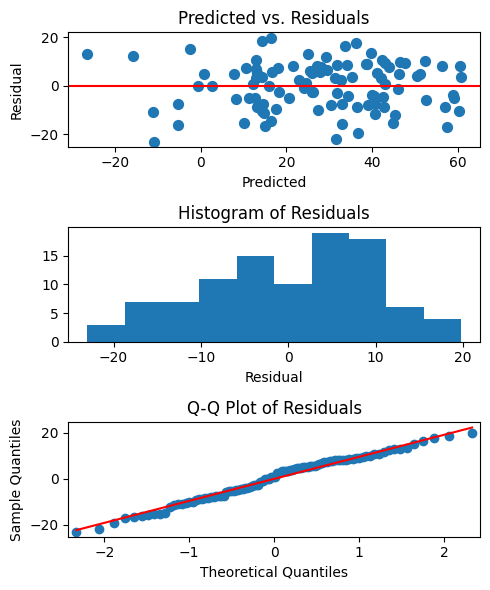

In [52]:
fig, axes = plt.subplots(3, 1, figsize=(5, 6))

# Scatter plot of predicted values vs. residuals
ax = axes[0]
ax.scatter(results.predict(), results.resid, s=50)
ax.axhline(0, color="red")
ax.set_title("Predicted vs. Residuals")
ax.set_xlabel("Predicted")
ax.set_ylabel("Residual")

# Histogram of residuals
ax = axes[1]
ax.hist(results.resid, bins=10)
ax.set_title("Histogram of Residuals")
ax.set_xlabel("Residual")

# Q-Q plot of residuals
ax = axes[2]
sm.graphics.qqplot(results.resid, line="s", ax=ax)
ax.set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

#### we can see the our line does seem to fit pretty nicely, and histogram of the residuals roughly approximate normal distribution, expecaily after looking at the Q-Q plot that shows that the residuals are normally disributed.

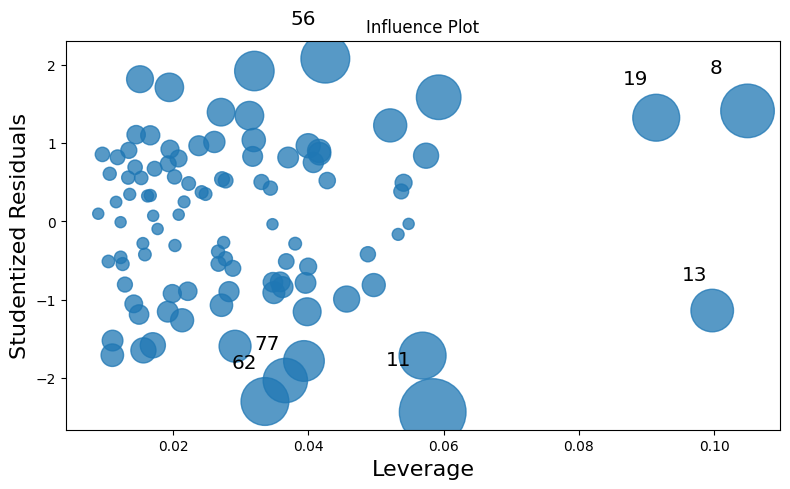

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))

# Influence plot
results.get_influence().plot_influence(ax=ax)
ax.set_title("Influence Plot")

plt.tight_layout()
plt.show()

#### We can see that although we have some outliers, most of the point are in a big cluster, meaning that they are "equal" in term of error in predicting them, and in infulence on the prediction itself.
#### We can try and remove number 8, who is our biggest outlier. droping it should hopefully help our regresion.

In [54]:
df = df.reset_index(drop=True) 
df = df.drop(8)

X = df.drop(["y"], axis =1)
y = df["y"]

# Rebuild the design matrix with the updated DataFrame
design = np.column_stack((X, np.ones(len(df))))


# Fit the OLS regression model
results = sm.OLS(y, design).fit()

# Print the summary of the new model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.38e-31
Time:                        21:09:38   Log-Likelihood:                -363.65
No. Observations:                  99   AIC:                             735.3
Df Residuals:                      95   BIC:                             745.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8062      0.499      7.634      0.0

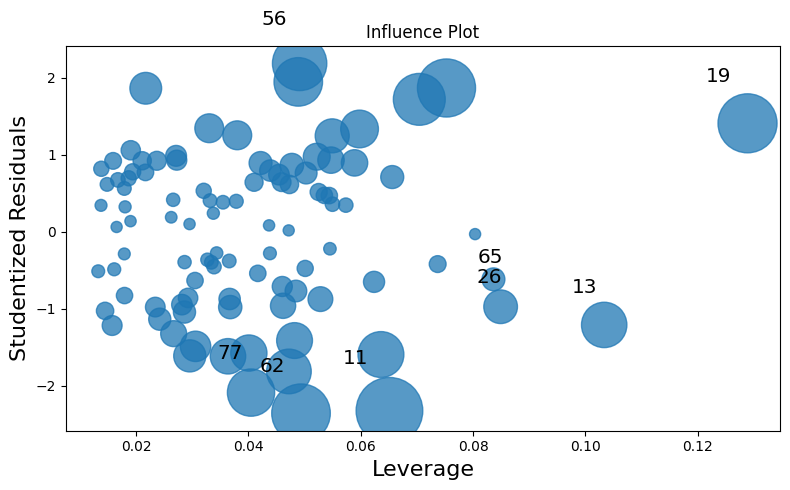

In [55]:
ig, ax = plt.subplots(figsize=(8, 5))

# Influence plot
results.get_influence().plot_influence(ax=ax)
ax.set_title("Influence Plot")

plt.tight_layout()
plt.show()

#### And we can see that our situation is better now.

### We tested stastsmodels on linear data. Let's try it on non-linear data.

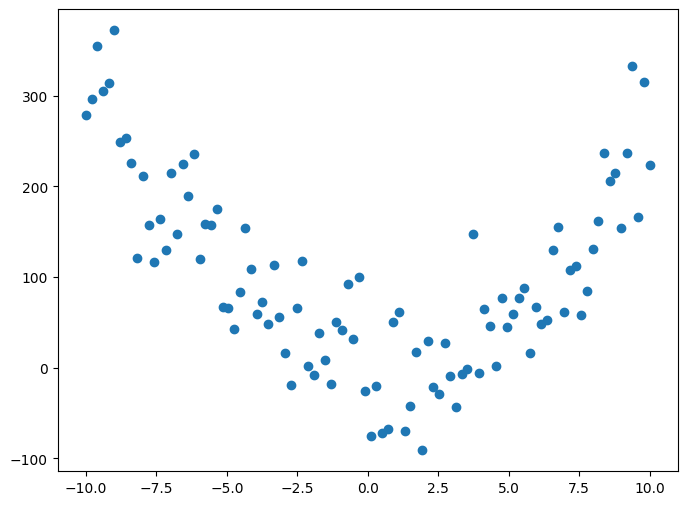

In [41]:
x = np.linspace(-10, 10, 100)

# Generate a quadratic relationship with added noise
y = 3 * x**2 - 5 * x + 2 + np.random.normal(0, 50, size=x.shape)

# Create DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    
})

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], label='Data Points')
plt.show()

#### Let's predict it like before:


In [42]:
# Prepare the design matrix with quadratic term
design = np.column_stack((df['x']**2, df['x'], np.ones(len(df))))

# Fit the OLS model
model = sm.OLS(df['y'], design)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.35e-32
Time:                        21:07:49   Log-Likelihood:                -531.62
No. Observations:                 100   AIC:                             1069.
Df Residuals:                      97   BIC:                             1077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9179      0.164     17.739      0.0

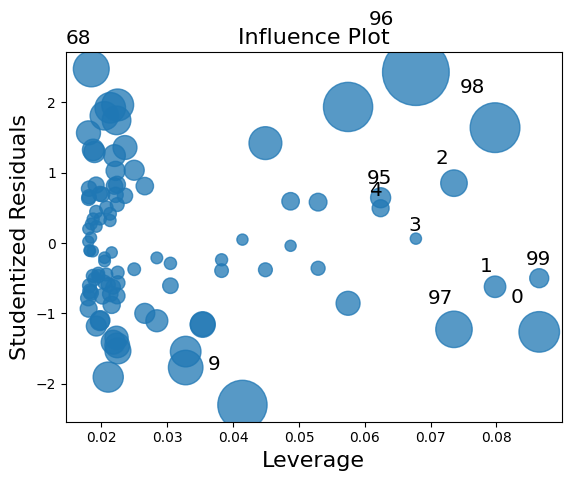

In [43]:
results.get_influence().plot_influence();

### Let's move on to some clustring. we can use tools like DBSCAN or k-means to generate clusters, and then by the innate function of statsmodels, we can represent it visually.

In [56]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Generate data with moderate noise
n_samples = 400
n_features = 2
n_clusters = 6
cluster_std = 0.80  # Standard deviation for each cluster
noise_level = 0.2  # Noise level
random_state = 42

# Generate blobs
X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  cluster_std=cluster_std, 
                  random_state=random_state)

# Add noise
X += noise_level * np.random.randn(n_samples, n_features)

# Optionally scale data
X = StandardScaler().fit_transform(X)

# Run DBSCAN
eps = 0.5
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Create a DataFrame for Seaborn
df1 = pd.DataFrame(X, columns=['x', 'y'])
df1['Cluster'] = labels


#### Let's represent it visually using statsmodels.

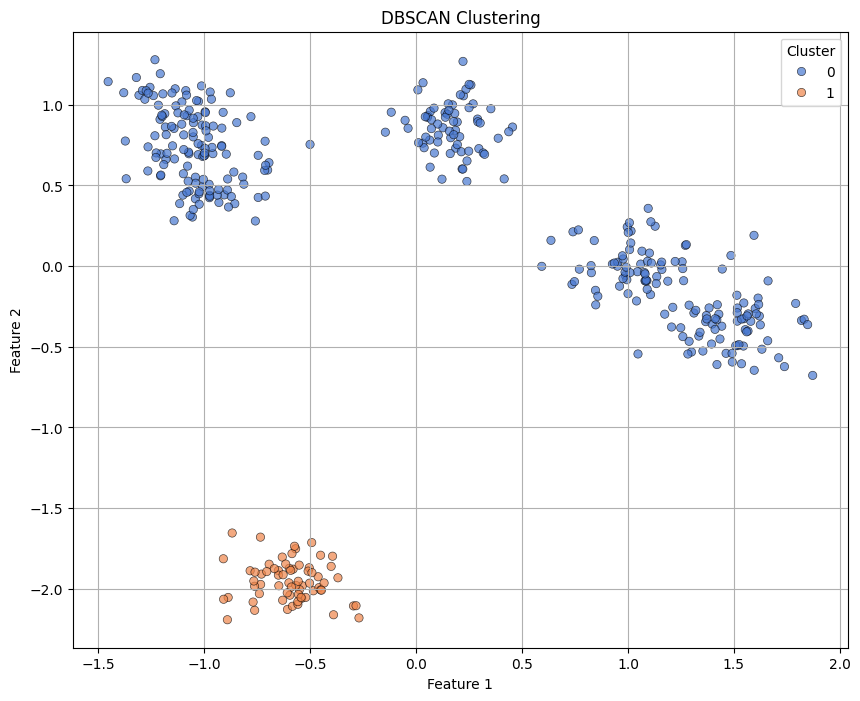

In [58]:
# Map noise points to white and clusters to colors
palette = {label: color for label, color in zip(set(df1['Cluster']), sns.color_palette("muted", n_colors=len(set(df1['Cluster']) - { -1 })))}
palette[-1] = 'white'  # Noise points in white

# Plot using seaborn scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df1, x="x", y="y", hue="Cluster", palette=palette, alpha=0.7, edgecolor='k',
    legend="brief"
)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


### Now for the last method we learned in this package: VIF. It's used to find multicollinearity.
#### High VIF: Indicates potential multicollinearity.
#### Low VIF: Indicates less multicollinearity.
### I will use a data set of heart disease patients for testing this feature.

In [59]:
df = pd.read_csv("/home/yair/Documents/Bar-Ilan/third-year/semester2/applied-statistics/my_work/statsmodels/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
X = df.drop('target', axis=1)
y = df['target']

#### Let's run simple logistic regression.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score



X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8131868131868132
Recall: 0.84
F1-score: 0.8316831683168316


/home/yair/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Now we can check the colinearty, and remove features that don't give us a lot of information for faster regression.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature in the DataFrame
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_df = calculate_vif(df)
print(vif_df)

     Feature        VIF
0        age  39.241186
1        sex   3.682952
2         cp   2.615083
3   trestbps  58.629045
4       chol  26.276396
5        fbs   1.268219
6    restecg   2.081059
7    thalach  47.459548
8      exang   2.060408
9    oldpeak   3.120906
10     slope  10.222614
11        ca   1.948893
12      thal  17.664200
13    target   4.428356


#### for example, we can remove trestbps and see how much it affect our regression.

In [63]:
X = X.drop(["trestbps"],axis =1)
X.head()

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,233,1,0,150,0,2.3,0,0,1
1,37,1,2,250,0,1,187,0,3.5,0,0,2
2,41,0,1,204,0,0,172,0,1.4,2,0,2
3,56,1,1,236,0,1,178,0,0.8,2,0,2
4,57,0,0,354,0,1,163,1,0.6,2,0,2


In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8131868131868132
Recall: 0.84
F1-score: 0.8316831683168316


/home/yair/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### And we can see that even after removing a features, the results pretty much stayed the same.